<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week09_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

Agus Prayogi (2141720025)

Diah Putri Nofianti (2141720054)

In [132]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week09"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [134]:
img = cv.imread(f'{path}/plat nomer.jpg', cv.IMREAD_GRAYSCALE)
kitten = cv.imread(f'{path}/kitten.jpg', cv.IMREAD_GRAYSCALE)
lily = cv.imread(f'{path}/lily.jpg', cv.IMREAD_GRAYSCALE)
j = cv.imread(f'{path}/j.png')

# **Dilasi**

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV.

In [135]:
def dilasi(img, kernel):

    # Dapatkan dimensi citra
    height, width = img.shape

    # Inisialisasi citra hasil dilasi
    dilated_img = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height-1):
        for j in range(1, width-1):
            if len(img.shape) == 2:
                region = img[i-1:i+2, j-1:j+2]
            elif len(img.shape) == 3:
                region = img[i-1:i+2, j-1:j+2, :]
            dilated_img[i, j] = np.max(region * kernel)

    return dilated_img

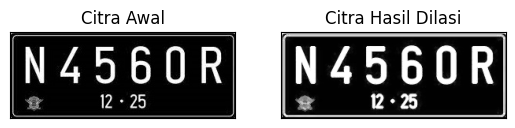

In [155]:
# Buat SED cross 3x3
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

dilated_img = dilasi(img, kernel)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilated_img, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV.

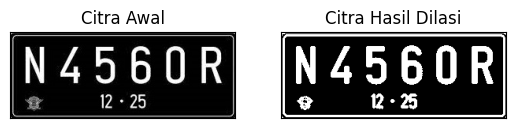

In [154]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

dilated_img = cv.dilate(thresh, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilated_img, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

# Erosi

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV.

In [138]:
def erosi(image, kernel):

    # Dapatkan dimensi citra
    height, width = image.shape

    # Inisialisasi citra hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan erosi
    img = np.zeros((image.shape[0]+2,image.shape[1]+2))
    img[1:-1,1:-1] = image
    for i in range(0,height-(kernel.shape[0]-1)):
        for j in range(0,width-(kernel.shape[0]-1)):
            eroded_image[i,j]=np.min(kernel * img[i:i+kernel.shape[0],j:j+kernel.shape[0]])

    return eroded_image

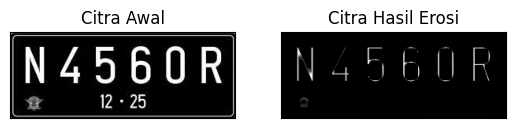

In [144]:
# Buat SE cross 5x5
kernel = np.ones((5, 5), np.uint8)

eroded_img = erosi(img, kernel)

plt.subplot(121), plt.imshow(img, cmap = 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(eroded_img, cmap = 'gray'), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi erosi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV.

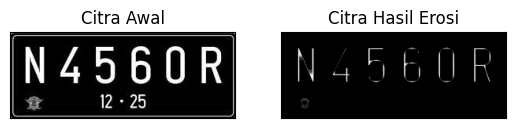

In [140]:
kernel = np.ones((5,5), np.uint8)

eroded_img = cv.erode(img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(eroded_img, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

# Opening

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa menggunakan library morphology dari
openCV.

In [145]:
def opening(image, kernel):

    # Operasi Erosi
    eroded_image = erosi(image, kernel)

    # Operasi Dilasi
    opened_image = dilasi(eroded_image, kernel)

    return opened_image

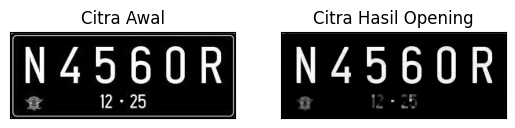

In [146]:
# Buat SE 3x3
kernel = np.ones((3, 3), np.uint8)

open_img = opening(img, kernel)

plt.subplot(121), plt.imshow(img, cmap = 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(open_img, cmap = 'gray'), plt.title('Citra Hasil Opening')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 dengan menggunakan library morphology dari
openCV.

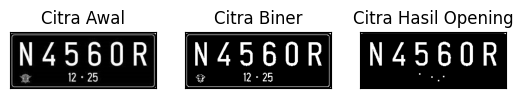

In [147]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
opened_img = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

plt.subplot(131), plt.imshow(img, cmap = 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray'), plt.title('Citra Biner')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(opened_img, cmap = 'gray'), plt.title('Citra Hasil Opening')
plt.xticks([]), plt.yticks([])
plt.show()

# Closing

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa menggunakan library morphology dari openCV.

In [148]:
def closing(image, kernel):
    # Operasi Dilasi
    dilated_image = dilasi(image, kernel)

    # Operasi Erosi
    closed_image = erosi(dilated_image, kernel)

    return closed_image

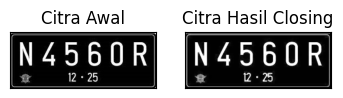

In [150]:
close_img = closing(img, kernel)

plt.subplot(131),plt.imshow(img, cmap = 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(close_img,cmap = 'gray'), plt.title('Citra Hasil Closing')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 dengan menggunakan library morphology dari openCV.

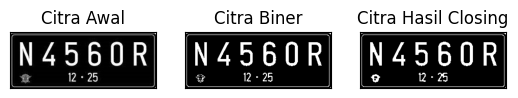

In [152]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
closed_img = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img, cmap = 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray'), plt.title('Citra Biner')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closed_img, cmap = 'gray'), plt.title('Citra Hasil Closing')
plt.xticks([]), plt.yticks([])
plt.show()

# Dilasi

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5.

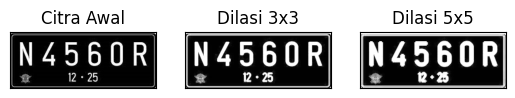

In [156]:
# Buat Structuring Elements (SE)
sed_3x3 = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
sed_5x5 = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

# Dilasi SE cross 3x3
dilated_3x3 = cv.dilate(img, sed_3x3, iterations=1)

# Dilasi SE cross 5x5
dilated_5x5 = cv.dilate(img, sed_5x5, iterations=1)

# Tampilkan hasil
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilated_3x3, cmap='gray'), plt.title('Dilasi 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dilated_5x5, cmap='gray'), plt.title('Dilasi 5x5')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5.

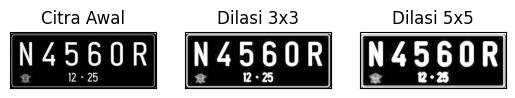

In [157]:
# SE circular 3x3
sed_3x3 = np.zeros((3, 3), dtype=np.uint8)
cv.circle(sed_3x3, (1, 1), 1, 1, -1)

# SE circular 5x5
sed_5x5 = np.zeros((5, 5), dtype=np.uint8)
cv.circle(sed_5x5, (2, 2), 2, 1, -1)

# Dilasi 3x3
dilated_3x3 = cv.dilate(img, sed_3x3, iterations=1)

# Dilasi 5x5
dilated_5x5 = cv.dilate(img, sed_5x5, iterations=1)

# Tampilkan hasil
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilated_3x3, cmap='gray'), plt.title('Dilasi 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dilated_5x5, cmap='gray'), plt.title('Dilasi 5x5')
plt.xticks([]), plt.yticks([])
plt.show()

# Erosi

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7.

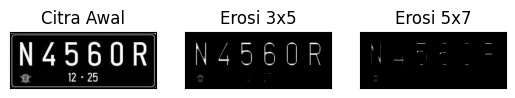

In [158]:
# SE Rectangle 3x5
sed_3x5 = np.ones((3, 5), dtype=np.uint8)

# SE Rectangle 5x7
sed_5x7 = np.ones((5, 7), dtype=np.uint8)

# Erosi 3x5
eroded_3x5 = cv.erode(img, sed_3x5, iterations=1)

# Erosi 5x7 SE
eroded_5x7 = cv.erode(img, sed_5x7, iterations=1)

# Tampilkan hasil
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(eroded_3x5, cmap='gray'), plt.title('Erosi 3x5')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(eroded_5x7, cmap='gray'), plt.title('Erosi 5x7')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5.

In [162]:
# SE Line Vertikal 3
sed_line_3 = np.ones((3, 1), dtype=np.uint8)

def erode_with_vertical_line_3(img, sed):

    # Dapatkan dimensi citra
    height, width = img.shape

    sed_height, sed_width = sed.shape

    half_sed_height = sed_height // 2

    eroded_img = np.zeros((height, width), dtype=np.uint8)

    for i in range(half_sed_height, height - half_sed_height):
        for j in range(width):
            region = img[i - half_sed_height:i + half_sed_height + 1, j]
            min_val = np.min(region * sed)
            eroded_img[i, j] = min_val

    return eroded_img

eroded_line_3 = erode_with_vertical_line_3(img, sed_line_3)

In [164]:
# SE Line Vertikal 5
sed_line_5 = np.ones((5, 1), dtype=np.uint8)

def erode_with_vertical_line_5(img, sed):

    # Dapatkan dimensi citra
    height, width = img.shape
    sed_height, sed_width = sed.shape

    half_sed_height = sed_height // 2

    eroded_img = np.zeros((height, width), dtype=np.uint8)

    for i in range(half_sed_height, height - half_sed_height):
        for j in range(width):
            region = img[i - half_sed_height:i + half_sed_height + 1, j]
            min_val = np.min(region * sed)
            eroded_img[i, j] = min_val

    return eroded_img

eroded_line_5 = erode_with_vertical_line_5(img, sed_line_5)

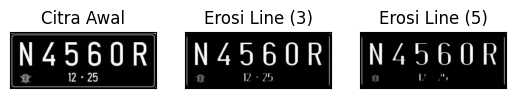

In [165]:
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(eroded_line_3, cmap='gray'), plt.title('Erosi Line (3)')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(eroded_line_5, cmap='gray'), plt.title('Erosi Line (5)')
plt.xticks([]), plt.yticks([])
plt.show()

# Top Hat

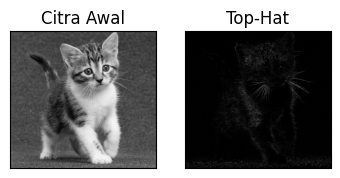

In [166]:
# SE Square 3x3
se_square_3x3 = np.ones((3, 3), dtype=np.uint8)

# Operasi top hat
tophat = cv.morphologyEx(kitten, cv.MORPH_TOPHAT, se_square_3x3)

# Tampilkan hasil
plt.subplot(131), plt.imshow(kitten, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(tophat, cmap='gray'), plt.title('Top-Hat')
plt.xticks([]), plt.yticks([])
plt.show()

# Black Hat

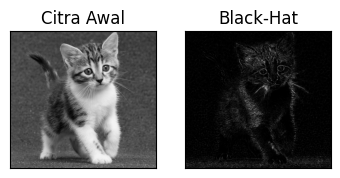

In [167]:
# SE Square 5x5
se_square_5x5 = np.ones((5, 5), dtype=np.uint8)

# Operasi black hat
blackhat = cv.morphologyEx(kitten, cv.MORPH_BLACKHAT, se_square_5x5)

# Tampilkan hasil
plt.subplot(131), plt.imshow(kitten, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(blackhat, cmap='gray'), plt.title('Black-Hat')
plt.xticks([]), plt.yticks([])
plt.show()

# Skeleton

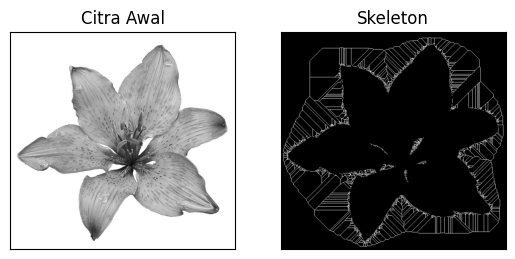

In [170]:
from skimage import filters
from skimage.morphology import skeletonize

bin = lily > filters.threshold_triangle(lily)

# binary
binary = bin.copy()
binary[binary == True] = 1
binary[binary == False] = 0

# skeletonize image
skeleton = skeletonize(binary)

plt.subplot(121), plt.imshow(lily, cmap = 'gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton, cmap = 'gray'), plt.title('Skeleton')
plt.xticks([]), plt.yticks([])
plt.show()

# Skeleton Inverse

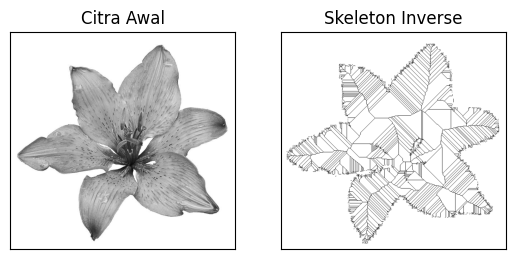

In [171]:
from skimage import io

binary = lily < filters.threshold_triangle(lily)

# skeletonize image
skeleton = skeletonize(binary)

plt.subplot(121),plt.imshow(lily, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton, cmap='gray_r'),plt.title('Skeleton Inverse')
plt.xticks([]), plt.yticks([])
plt.show()

# Thickening

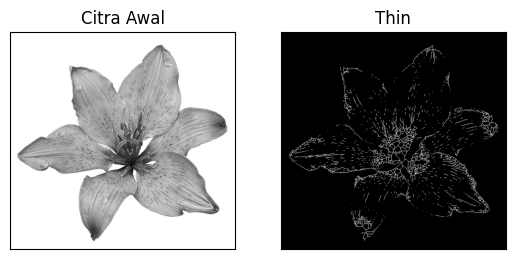

In [172]:
from skimage import io, color, morphology

image = color.rgb2gray(io.imread(f'{path}/lily.jpg'))

# Binary
binary_image = image < 0.5

# Operasi thickening
thickened_image = morphology.thin(binary_image)

plt.subplot(121),plt.imshow(lily, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thickened_image, cmap='gray'),plt.title('Thin')
plt.xticks([]), plt.yticks([])
plt.show()